# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 651


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'metric'

# build the base query url

queryURL= f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = queryURL + city
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather ["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather ["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds =city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        
       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
        
       
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | gananoque
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | kawalu
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | comodoro rivadavia
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | wangaratta
Processing Record 12 of Set 1 | young
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | udachnyy
Processing Record 16 of Set 1 | orange walk
Processing Record 17 of Set 1 | tornio
Processing Record 18 of Set 1 | conway
Processing Record 19 of Set 1 | hualmay
Processing Record 20 of Set 1 | bend
Processing Record 21 of Set 1 | batagay
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | klaksvik
Pro

Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | crab hill
City not found. Skipping...
Processing Record 44 of Set 4 | iowa city
Processing Record 45 of Set 4 | corner brook
Processing Record 46 of Set 4 | ekibastuz
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | buguda
Processing Record 0 of Set 5 | arroio grande
Processing Record 1 of Set 5 | tecoanapa
Processing Record 2 of Set 5 | auki
Processing Record 3 of Set 5 | vaitape
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | baruun-urt
Processing Record 7 of Set 5 | pangnirtung
Processing Record 8 of Set 5 | vegreville
Processing Record 9 of Set 5 | guozhen
Processing Record 10 of Set 5 | saint george
Processing Record 11 of Set 5 | warqla
City not found. Skipping...
Processing Record 12 of Set 5 | wanning
Processing Record 13 of Set 5 | tofield
Process

Processing Record 31 of Set 8 | eyl
Processing Record 32 of Set 8 | shkotovo-26
City not found. Skipping...
Processing Record 33 of Set 8 | show low
Processing Record 34 of Set 8 | chagda
City not found. Skipping...
Processing Record 35 of Set 8 | monte carmelo
Processing Record 36 of Set 8 | beloha
Processing Record 37 of Set 8 | tommot
Processing Record 38 of Set 8 | guanica
Processing Record 39 of Set 8 | ballina
Processing Record 40 of Set 8 | lowicz
Processing Record 41 of Set 8 | saquena
Processing Record 42 of Set 8 | mantua
Processing Record 43 of Set 8 | san luis
Processing Record 44 of Set 8 | north bend
Processing Record 45 of Set 8 | roald
Processing Record 46 of Set 8 | morgantown
Processing Record 47 of Set 8 | ngong
Processing Record 48 of Set 8 | miedzychod
Processing Record 49 of Set 8 | taybad
Processing Record 0 of Set 9 | palm valley
Processing Record 1 of Set 9 | samusu
City not found. Skipping...
Processing Record 2 of Set 9 | olinda
Processing Record 3 of Set 9 |

Processing Record 17 of Set 12 | puerto cabezas
Processing Record 18 of Set 12 | pecos
Processing Record 19 of Set 12 | talpa
Processing Record 20 of Set 12 | port-gentil
Processing Record 21 of Set 12 | edd
Processing Record 22 of Set 12 | kitimat
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | eston
Processing Record 25 of Set 12 | dusti
Processing Record 26 of Set 12 | champasak
Processing Record 27 of Set 12 | camana
Processing Record 28 of Set 12 | ures
Processing Record 29 of Set 12 | bud
Processing Record 30 of Set 12 | deputatskiy
Processing Record 31 of Set 12 | westport
Processing Record 32 of Set 12 | warrington
Processing Record 33 of Set 12 | nepalganj
City not found. Skipping...
Processing Record 34 of Set 12 | bagru
Processing Record 35 of Set 12 | tungor
Processing Record 36 of Set 12 | matay
Processing Record 37 of Set 12 | marica
Processing Record 38 of Set 12 | half moon bay
Processing Record 39 of Set 12 | sydney mines
Processing Record 40 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,20.06,75,20,10.80,ZA,1678129802
1,gananoque,44.3334,-76.1661,3.04,49,100,2.87,CA,1678129965
2,hithadhoo,-0.6000,73.0833,27.92,67,5,0.70,MV,1678129965
3,mataura,-46.1927,168.8643,9.15,93,100,1.48,NZ,1678129966
4,lavrentiya,65.5833,-171.0000,-6.34,96,100,5.69,RU,1678129966


In [6]:
# Export the City_Data into a csv


city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,20.06,75,20,10.80,ZA,1678129802
1,gananoque,44.3334,-76.1661,3.04,49,100,2.87,CA,1678129965
2,hithadhoo,-0.6000,73.0833,27.92,67,5,0.70,MV,1678129965
3,mataura,-46.1927,168.8643,9.15,93,100,1.48,NZ,1678129966
4,lavrentiya,65.5833,-171.0000,-6.34,96,100,5.69,RU,1678129966


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

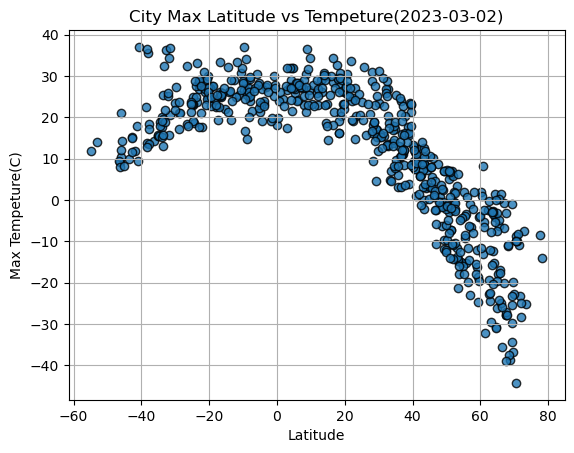

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolors = "black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Tempeture(2023-03-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempeture(C)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

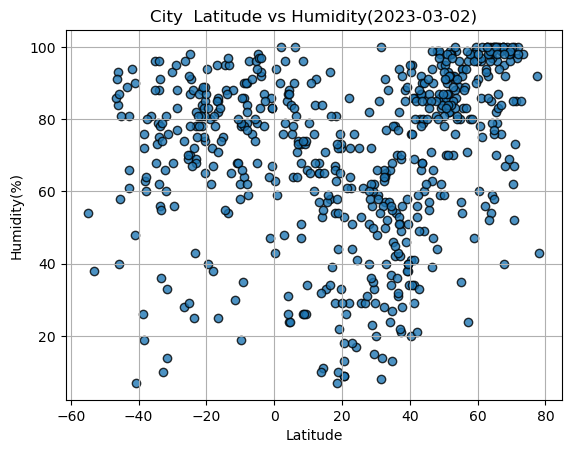

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",edgecolors = "black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("City  Latitude vs Humidity(2023-03-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

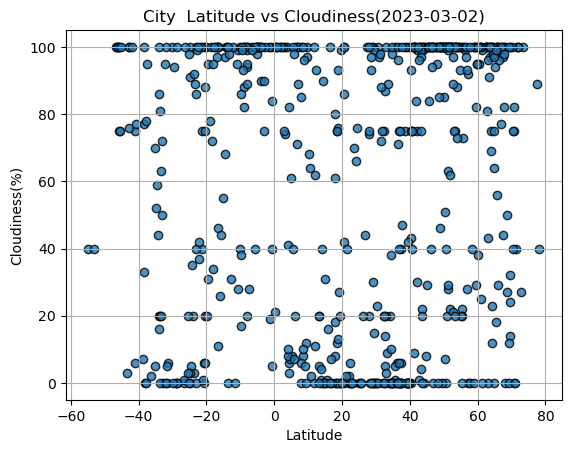

In [10]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",edgecolors = "black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("City  Latitude vs Cloudiness(2023-03-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

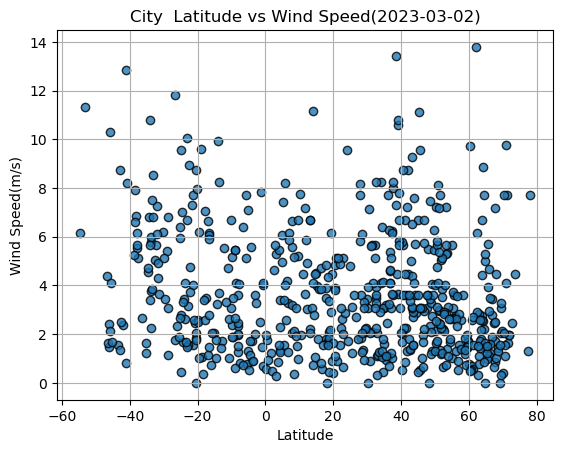

In [11]:
# Build scatter plot for latitude vs. Wind Speed 
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",edgecolors = "black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("City  Latitude vs Wind Speed(2023-03-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gananoque,44.3334,-76.1661,3.04,49,100,2.87,CA,1678129965
4,lavrentiya,65.5833,-171.0000,-6.34,96,100,5.69,RU,1678129966
6,chokurdakh,70.6333,147.9167,-44.26,100,82,1.11,RU,1678129967
12,tuktoyaktuk,69.4541,-133.0374,-29.69,98,14,3.06,CA,1678129969
13,jamestown,42.0970,-79.2353,5.77,56,99,4.47,US,1678129744


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,20.06,75,20,10.80,ZA,1678129802
2,hithadhoo,-0.6000,73.0833,27.92,67,5,0.70,MV,1678129965
3,mataura,-46.1927,168.8643,9.15,93,100,1.48,NZ,1678129966
5,kawalu,-7.3817,108.2082,21.55,96,28,0.83,ID,1678129967
7,hobart,-42.8794,147.3294,15.14,61,100,8.75,AU,1678129217


###  Temperature vs. Latitude Linear Regression Plot

In [14]:
from scipy import stats

 The R value is :-0.8809887789806052


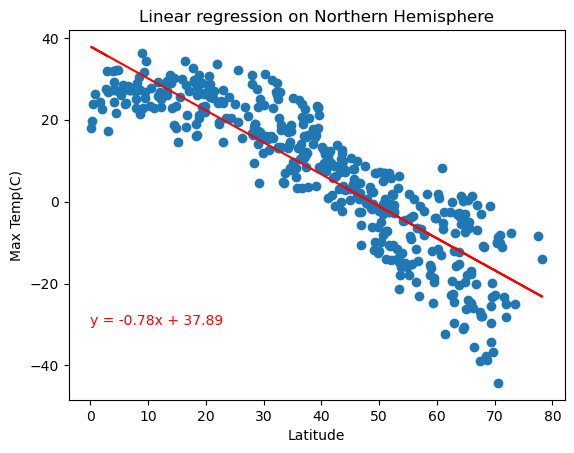

In [15]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

# perform the linear regression
(slope, intercept, rvalue, pvalue, sterr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# generate the data points for the regression line
regressionValues = northern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

print(f" The R value is :{rvalue}")
# print the regression line
plt.plot(northern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (0,-30), color="red")

plt.title("Linear regression on Northern Hemisphere")
plt.ylabel("Max Temp(C)")
plt.xlabel("Latitude")
plt.show()

 The R value is :0.5181519962755031


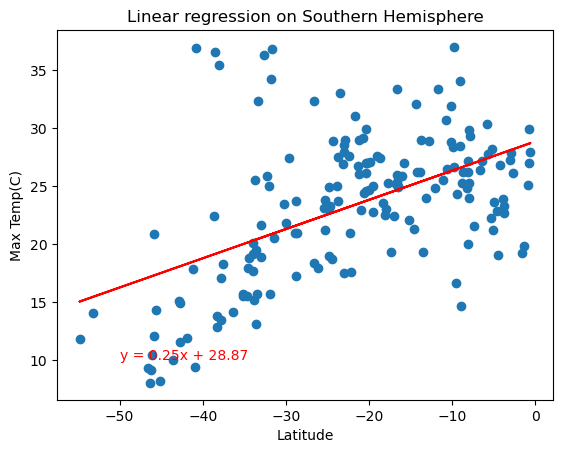

In [16]:
# Linear regression on Southern Hemisphere

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

# perform the linear regression
(slope, intercept, rvalue, pvalue, sterr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# generate the data points for the regression line
regressionValues = southern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

print(f" The R value is :{rvalue}")
# print the regression line
plt.plot(southern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (-50,10), color="red")

plt.title("Linear regression on Southern Hemisphere")
plt.ylabel("Max Temp(C)")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:**
Based on the r value of both Northern and southern we could see very weak - weak correlation between latitude and max temp.

### Humidity vs. Latitude Linear Regression Plot

 The R value is :0.45414542584483464


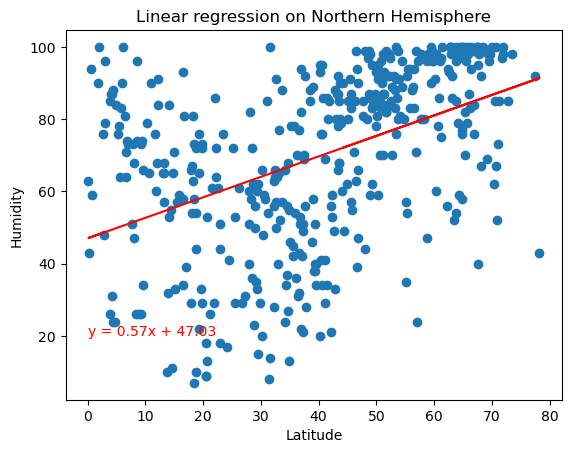

In [17]:
# Northern Hemisphere

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

# perform the linear regression
(slope, intercept, rvalue, pvalue, sterr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# generate the data points for the regression line
regressionValues = northern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

print(f" The R value is :{rvalue}")
# print the regression line
plt.plot(northern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (0,20), color="red")

plt.title("Linear regression on Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

 The R value is :0.20229537602648215


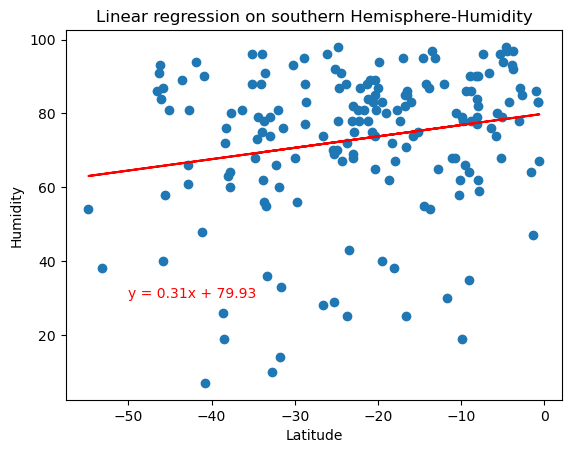

In [18]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

# perform the linear regression
(slope, intercept, rvalue, pvalue, sterr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# generate the data points for the regression line
regressionValues = southern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

print(f" The R value is :{rvalue}")
# print the regression line
plt.plot(southern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (-50,30), color="red")

plt.title("Linear regression on southern Hemisphere-Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:**  r value of both northern and southern values are slightly greater than 0.3, strength of correlation between latitude and humidity look weak.

### Cloudiness vs. Latitude Linear Regression Plot

 The R value is :0.2869543187836469


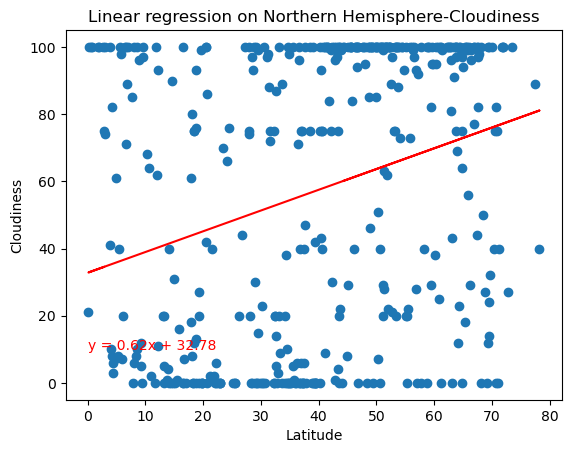

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

# perform the linear regression
(slope, intercept, rvalue, pvalue, sterr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# generate the data points for the regression line
regressionValues = northern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

print(f" The R value is :{rvalue}")
# print the regression line
plt.plot(northern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (0,10), color="red")

plt.title("Linear regression on Northern Hemisphere-Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

 The R value is :0.2229896052231146


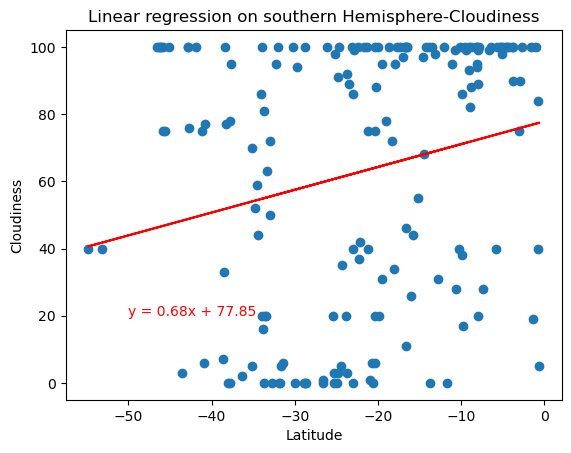

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

# perform the linear regression
(slope, intercept, rvalue, pvalue, sterr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# generate the data points for the regression line
regressionValues = southern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

print(f" The R value is :{rvalue}")
# print the regression line
plt.plot(southern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (-50,20), color="red")

plt.title("Linear regression on southern Hemisphere-Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:**  Correlation between latitude and cloudiness looks none or very weak.

### Wind Speed vs. Latitude Linear Regression Plot

 The R value is :-0.06672215900677946


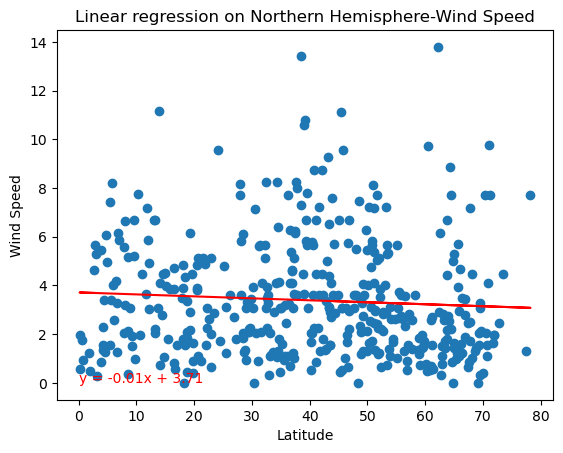

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

# perform the linear regression
(slope, intercept, rvalue, pvalue, sterr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# generate the data points for the regression line
regressionValues = northern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

print(f" The R value is :{rvalue}")
# print the regression line
plt.plot(northern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (0,0), color="red")

plt.title("Linear regression on Northern Hemisphere-Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

 The R value is :-0.28147685792070354


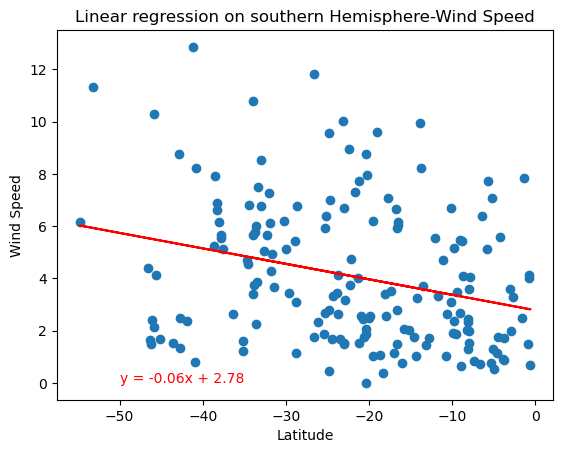

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

# perform the linear regression
(slope, intercept, rvalue, pvalue, sterr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# generate the data points for the regression line
regressionValues = southern_hemi_df["Lat"] * slope + intercept

# line of best fit equation
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

print(f" The R value is :{rvalue}")
# print the regression line
plt.plot(southern_hemi_df["Lat"], regressionValues, "r-")
# annotate the equation on to the graph
plt.annotate(lineEQ, (-50,0), color="red")

plt.title("Linear regression on southern Hemisphere-Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:**  looking at the r values we could say that there is no correlation between latitude and wind speed.